In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
from pathlib import Path
from tqdm.auto import tqdm
from types import SimpleNamespace
import os
from PIL import Image
import csv

In [ ]:
!pip install kaggle


In [ ]:
mkdir -p ~/.kaggle
mv /google/mount/kaggle.json ~/.kaggle/
chmod 600 ~/.kaggle/kaggle.json


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!ls -ltr /content/drive/MyDrive/Yolov8/

total 242
drwx------ 2 root root   4096 May 27 05:20 dataset
-rw------- 1 root root     69 May 27 07:10 kaggle.json
-rw------- 1 root root 234402 May 27 07:59 Yarra_Yolov8.ipynb
-rw------- 1 root root    121 May 27 11:35 classes_with_dont_care.json
drwx------ 2 root root   4096 May 28 05:09 weights
drwx------ 2 root root   4096 May 30 18:03 RoadLane


In [ ]:
#!mkdir -p /content/kitti_dataset/kaggle
#!cp /content/drive/MyDrive/Yolov8//kaggle.json /content/kitti_dataset/kaggle
#!cp /content/drive/MyDrive/Yolov8//kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json


In [ ]:
ls -ltr /root/.kaggle

total 4
-rw------- 1 root root 69 May 31 17:50 kaggle.json


In [ ]:
!kaggle -h

usage: kaggle [-h] [-v] {competitions,c,datasets,d,kernels,k,models,m,files,f,config} ...

options:
  -h, --help            show this help message and exit
  -v, --version         show program's version number and exit

commands:
  {competitions,c,datasets,d,kernels,k,models,m,files,f,config}
                        Use one of:
                        competitions {list, files, download, submit, submissions, leaderboard}
                        datasets {list, files, download, create, version, init, metadata, status}
                        kernels {list, files, init, push, pull, output, status}
                        models {instances, get, list, init, create, delete, update}
                        models instances {versions, get, files, init, create, delete, update}
                        models instances versions {init, create, download, delete, files}
                        config {view, set, unset}
    competitions (c)    Commands related to Kaggle competitions
    datasets (d

In [ ]:
!ls -ltr /root/.kaggle

total 0


In [ ]:
!kaggle kernels pull srinivasyarra/object-detection-via-yolov8 -p /content/drive/MyDrive/Yolov8/


Source code downloaded to /content/drive/MyDrive/Yolov8/object-detection-via-yolov8.ipynb


In [ ]:
!kaggle kernels output srinivasyarra/object-detection-via-yolov8 -p /content/drive/MyDrive/Yolov8/output/


In [ ]:
!ls -ltr /content/drive/MyDrive/Yolov8/output/

total 0


In [ ]:
!kaggle kernels output srinivasyarra/object-detection-via-yolov8/ -p /content/drive/MyDrive/Yolov8/yarra

Output file downloaded to /content/drive/MyDrive/Yolov8/yarra/Yarra-yolov8n-kitti/object_improved_training/F1_curve.png
Output file downloaded to /content/drive/MyDrive/Yolov8/yarra/Yarra-yolov8n-kitti/object_improved_training/PR_curve.png
Output file downloaded to /content/drive/MyDrive/Yolov8/yarra/Yarra-yolov8n-kitti/object_improved_training/P_curve.png
Output file downloaded to /content/drive/MyDrive/Yolov8/yarra/Yarra-yolov8n-kitti/object_improved_training/R_curve.png
Output file downloaded to /content/drive/MyDrive/Yolov8/yarra/Yarra-yolov8n-kitti/object_improved_training/args.yaml
Output file downloaded to /content/drive/MyDrive/Yolov8/yarra/Yarra-yolov8n-kitti/object_improved_training/confusion_matrix.png
Output file downloaded to /content/drive/MyDrive/Yolov8/yarra/Yarra-yolov8n-kitti/object_improved_training/confusion_matrix_normalized.png
Output file downloaded to /content/drive/MyDrive/Yolov8/yarra/Yarra-yolov8n-kitti/object_improved_training/events.out.tfevents.1717149256.

In [ ]:
!kaggle kernels list srinivasyarra/object-detection-via-yolov8/train -p /content/drive/MyDrive/Yolov8/yarra

usage: kaggle kernels [-h] {list,files,init,push,pull,output,status} ...
kaggle kernels: error: argument command: invalid choice: 'output/train' (choose from 'list', 'files', 'init', 'push', 'pull', 'output', 'status')


In [ ]:
!kaggle kernels files srinivasyarra/object-detection-via-yolov8/train

Next Page Token = eyJHY3NQYWdlVG9rZW4iOiIxODAyNzcxNzkvb3V0cHV0L1lhcnJhLXlvbG92OG4ta2l0dGkvdHJhaW4vdmFsX2JhdGNoMl9sYWJlbHMuanBnIn0=
name                                              size  creationDate                      
------------------------------------------------  ----  --------------------------------  
F1_curve.png                                      941B  3:42 pm, Tuesday 28 May 2024 UTC  
PR_curve.png                                      941B  3:42 pm, Tuesday 28 May 2024 UTC  
P_curve.png                                       938B  3:42 pm, Tuesday 28 May 2024 UTC  
R_curve.png                                       938B  3:42 pm, Tuesday 28 May 2024 UTC  
args.yaml                                         932B  3:42 pm, Tuesday 28 May 2024 UTC  
confusion_matrix.png                              965B  3:42 pm, Tuesday 28 May 2024 UTC  
confusion_matrix_normalized.png                   998B  3:42 pm, Tuesday 28 May 2024 UTC  
events.out.tfevents.1716911259.548d817c3539.25.0  

In [ ]:
!ls -ltr "/content/drive/MyDrive/Yolov8/dataset/Road lane detection.v3i.yolov8.zip"

-rw------- 1 root root 7397862 May 30 05:15 '/content/drive/MyDrive/Yolov8/dataset/Road lane detection.v3i.yolov8.zip'


In [ ]:
def list_directory_structure(base_dir, depth=2):
    for root, dirs, files in os.walk(base_dir):
        level = root.replace(base_dir, '').count(os.sep)
        if level < depth:
            indent = ' ' * 4 * (level)
            print(f"{indent}{os.path.basename(root)}/")
            subindent = ' ' * 4 * (level + 1)
            for f in files:
                print(f"{subindent}{f}")

list_directory_structure('/content/drive/MyDrive/Yolov8/dataset/')

/
    Road lane detection.v3i.yolov8.zip
Kitti_road_dataset/
    dataset.yaml
    train/
        labels.cache
    test/
        labels.cache


In [ ]:
# Extract the downloaded dataset
!unzip -q "/content/drive/MyDrive/Yolov8/dataset/Road lane detection.v3i.yolov8.zip" -d /content/kitti_dataset

In [ ]:
!ls -ltr /content/kitti_dataset

total 20
drwxr-xr-x 4 root root 4096 Oct 15  2023 valid
drwxr-xr-x 4 root root 4096 Oct 15  2023 train
-rw-r--r-- 1 root root  973 Oct 15  2023 README.roboflow.txt
-rw-r--r-- 1 root root  155 Oct 15  2023 README.dataset.txt
-rw-r--r-- 1 root root  329 Oct 15  2023 data.yaml


In [ ]:
!ls -ltr /content/kitti_dataset/train/labels|wc -l

38


In [ ]:
base_dir = Path('/content/kitti_dataset')
# Create a SimpleNamespace for the metadata
meta = SimpleNamespace(
    train_img_path = base_dir / 'train' / 'images',
    val_img_path = base_dir / 'valid' / 'images',
    test_img_path = base_dir / 'test' / 'images'
)

# List the images in each directory
meta.train_ims = sorted(list(meta.train_img_path.glob('*')))
meta.val_ims = sorted(list(meta.val_img_path.glob('*')))
meta.test_ims = sorted(list(meta.test_img_path.glob('*')))

# Assuming labels are stored in a similar structure as images
meta.label_path = base_dir / 'train' / 'labels'  # Update this if the label path is different

# List the labels in the directory
meta.train_labels = sorted(list(meta.label_path.glob('*')))

# Create DataFrames for each set
meta.train_df = pd.DataFrame({'image': meta.train_ims, 'label': meta.train_labels})
meta.val_df = pd.DataFrame({'image': meta.val_ims})
meta.test_df = pd.DataFrame({'image': meta.test_ims})

# Optional: Define the image dimensions (if known)
meta.im_width = 256
meta.im_height = 160

# Additional metadata from data.yaml
meta.nc = 4
meta.names = ['lane1-white-', 'lane1-yellow-', 'lane2-white-', 'lane2-yellow-']

meta.roboflow = SimpleNamespace(
    workspace = 'makariy-xodcv',
    project = 'road-lane-detection',
    version = 3,
    license = 'CC BY 4.0',
    url = 'https://universe.roboflow.com/makariy-xodcv/road-lane-detection/dataset/3'
)

# Define label columns (assuming the same as the older dataset)
meta.label_cols = [
    'label', 'truncated', 'occluded', 'alpha',
    'bbox_xmin', 'bbox_ymin', 'bbox_xmax',
    'bbox_ymax', 'dim_height', 'dim_width', 'dim_length',
    'loc_x', 'loc_y', 'loc_z', 'rotation_y', 'score'
]

# Function to get labels
def get_label(label_path):
    data = pd.read_csv(
        label_path,
        sep=" ",
        names=meta.label_cols[:15],
        usecols=meta.label_cols[:15]
    )
    return data

# Example usage of get_label function with an index from meta.train_df
label_data = get_label(meta.train_df['label'][10])

# Print DataFrame summaries to verify
print(meta.train_df.head())
print(meta.val_df.head())
print(meta.test_df.head())

# Print additional metadata to verify
print(f"Number of classes (nc): {meta.nc}")
print(f"Class names: {meta.names}")
print(f"Roboflow project URL: {meta.roboflow.url}")

# Print example label data
print(label_data.head())

                                               image  \
0  /content/kitti_dataset/train/images/-_35_jpeg....   
1  /content/kitti_dataset/train/images/-_35_jpeg....   
2  /content/kitti_dataset/train/images/-_49_jpeg....   
3  /content/kitti_dataset/train/images/-_49_jpeg....   
4  /content/kitti_dataset/train/images/-_85_jpeg....   

                                               label  
0  /content/kitti_dataset/train/labels/-_35_jpeg....  
1  /content/kitti_dataset/train/labels/-_35_jpeg....  
2  /content/kitti_dataset/train/labels/-_49_jpeg....  
3  /content/kitti_dataset/train/labels/-_49_jpeg....  
4  /content/kitti_dataset/train/labels/-_85_jpeg....  
                                               image
0  /content/kitti_dataset/valid/images/-_38_jpeg....
1  /content/kitti_dataset/valid/images/-_45_jpeg....
2  /content/kitti_dataset/valid/images/-_4_jpeg.r...
3  /content/kitti_dataset/valid/images/-_54_jpeg....
4  /content/kitti_dataset/valid/images/-_78_jpeg....
Empty DataFrame

In [ ]:
#Define label columns (assuming the same as the older dataset)
meta.label_cols = [
    'label', 'truncated', 'occluded', 'alpha',
    'bbox_xmin', 'bbox_ymin', 'bbox_xmax',
    'bbox_ymax', 'dim_height', 'dim_width', 'dim_length',
    'loc_x', 'loc_y', 'loc_z', 'rotation_y', 'score'
]

# Function to get labels
def get_label(label_path):
    data = pd.read_csv(
        label_path,
        sep=" ",
        names=meta.label_cols[:15],
        usecols=meta.label_cols[:15]
    )
    return data

In [ ]:
def open_image(p):
    im = cv.imread(str(p))
    im = cv.cvtColor(im,cv.COLOR_BGR2RGB)
    return im

def draw_box2d(idx, ax = None):
    sample = meta.df.iloc[idx,:]
    img = open_image(sample['image'])
    labels = get_label(sample['label'])
    for index, row in labels.iterrows():
        left_corner = (int(row.bbox_xmin), int(row.bbox_ymin))
        right_corner = (int(row.bbox_xmax), int(row.bbox_ymax))

        if row.label == 'DontCare':
            continue

        label_color = meta.label_colors.get(row.label,(0,255,0))
        img = cv.rectangle(img,left_corner, right_corner, label_color, 2)
        img = cv.putText(img, row.label,
                          (left_corner[0] + 10, left_corner[1] - 4) ,
                          cv.FONT_HERSHEY_SIMPLEX, 1,
                          label_color, 3)

    if ax == None:
        plt.imshow(img)
    else:
        ax.imshow(img)

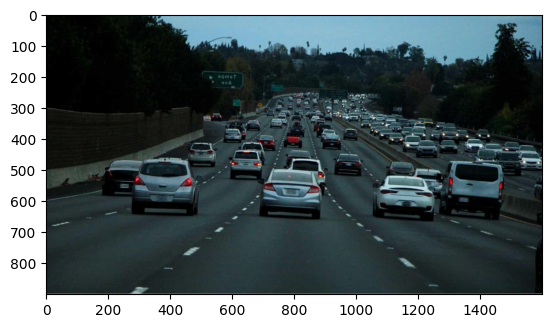

In [ ]:
from types import SimpleNamespace
from pathlib import Path
import pandas as pd
import cv2 as cv
import matplotlib.pyplot as plt

# Define the base directory for the new dataset
base_dir = Path('/content/kitti_dataset')  # Change this to your dataset's actual base directory

# Create a SimpleNamespace for the metadata
meta = SimpleNamespace(
    train_img_path = base_dir / 'train' / 'images',
    val_img_path = base_dir / 'valid' / 'images',
    test_img_path = base_dir / 'test' / 'images',
    label_path = base_dir / 'train' / 'labels'  # Update this if the label path is different
)

# List the images and labels in each directory
meta.train_ims = sorted(list(meta.train_img_path.glob('*')))
meta.val_ims = sorted(list(meta.val_img_path.glob('*')))
meta.test_ims = sorted(list(meta.test_img_path.glob('*')))
meta.train_labels = sorted(list(meta.label_path.glob('*')))

# Create DataFrames for each set
meta.train_df = pd.DataFrame({'image': meta.train_ims, 'label': meta.train_labels})
meta.val_df = pd.DataFrame({'image': meta.val_ims})
meta.test_df = pd.DataFrame({'image': meta.test_ims})

# Additional metadata from data.yaml
meta.nc = 4
meta.names = ['lane1-white-', 'lane1-yellow-', 'lane2-white-', 'lane2-yellow-']
meta.label_colors = {
    'lane1-white-': (255, 255, 255),
    'lane1-yellow-': (255, 255, 0),
    'lane2-white-': (200, 200, 200),
    'lane2-yellow-': (200, 200, 0)
}

meta.label_cols = [
    'label', 'truncated', 'occluded', 'alpha',
    'bbox_xmin', 'bbox_ymin', 'bbox_xmax',
    'bbox_ymax', 'dim_height', 'dim_width', 'dim_length',
    'loc_x', 'loc_y', 'loc_z', 'rotation_y', 'score'
]

# Function to get labels
def get_label(label_path):
    data = pd.read_csv(
        label_path,
        sep=" ",
        names=meta.label_cols[:15],
        usecols=meta.label_cols[:15]
    )
    return data

# Function to open an image
def open_image(p):
    im = cv.imread(str(p))
    im = cv.cvtColor(im, cv.COLOR_BGR2RGB)
    return im

# Function to draw 2D bounding boxes
def draw_box2d(idx, ax=None):
    if idx >= len(meta.train_df):
        print(f"Index {idx} is out of bounds for the dataset of size {len(meta.train_df)}.")
        return

    sample = meta.train_df.iloc[idx, :]
    img = open_image(sample['image'])
    labels = get_label(sample['label'])
    for index, row in labels.iterrows():
        left_corner = (int(row.bbox_xmin), int(row.bbox_ymin))
        right_corner = (int(row.bbox_xmax), int(row.bbox_ymax))

        if row.label == 'DontCare':
            continue

        label_color = meta.label_colors.get(row.label, (0, 255, 0))
        img = cv.rectangle(img, left_corner, right_corner, label_color, 2)
        img = cv.putText(img, str(row.label),  # Ensure label is string
                          (left_corner[0] + 10, left_corner[1] - 4),
                          cv.FONT_HERSHEY_SIMPLEX, 1,
                          label_color, 3)

    if ax is None:
        plt.imshow(img)
        plt.show()
    else:
        ax.imshow(img)

# Example usage
draw_box2d(25)  # This will display the image with bounding boxes for the 11th image in the training set


In [ ]:
# Print example label data
print(label_data.head())

   label  truncated  occluded     alpha  bbox_xmin  bbox_ymin  bbox_xmax  \
0      3   0.629386  1.000000  0.541187   0.446363   0.531164   0.395308   
1      3   0.564297  1.000000  0.528326   0.458577   0.522016   0.390890   
2      2   1.000000  0.549845  0.919591   0.511087   0.766482   0.432429   
3      2   0.429910  0.358530  0.425199   0.357616   0.391876   0.374977   

   bbox_ymax  dim_height  dim_width  dim_length     loc_x     loc_y     loc_z  \
0   0.526025    0.372807   0.522855    0.355674  0.519737  0.355629  0.522844   
1   0.517929    0.355943   0.515043    0.356007  0.515380  0.377103  0.517755   
2   0.660687    0.374520   0.621111    0.356474  0.616828  0.358187  0.636445   
3   0.000000    0.602548   0.000039    0.619779  0.393246  0.379774  0.429910   

   rotation_y  
0    0.377680  
1    0.394456  
2    0.367896  
3    0.358530  


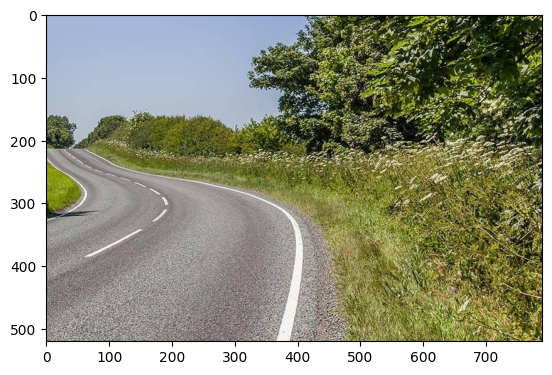

In [ ]:
draw_box2d(15)

In [ ]:
class_names = [
    'lane1-white-',  # 0
    'lane1-yellow-', # 1
    'lane2-white-',  # 2
    'lane2-yellow-'  # 3
]

CLAZZ_NUMBERS = {
    name: idx for idx, name in enumerate(class_names)
}


In [ ]:
import os
from PIL import Image
import csv
from tqdm import tqdm
from types import SimpleNamespace
import logging
import argparse
import sys

# Setup logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Constants and variables
all_classes = []
OUT_LABELS_DIR = "labels_with_dont_care"
KEY_DONT_CARE = "DontCare"
class_names = ['lane1-white-', 'lane1-yellow-', 'lane2-white-', 'lane2-yellow-', 'DontCare']

CLAZZ_NUMBERS = {
    name: idx for idx, name in enumerate(class_names)
}

def getSampleId(path):
    basename = os.path.basename(path)
    return os.path.splitext(basename)[0]

def resolveClazzNumberOrNone(clazz, use_dont_care):
    if use_dont_care and clazz == KEY_DONT_CARE:
        return CLAZZ_NUMBERS[clazz]
    elif clazz in CLAZZ_NUMBERS:
        return CLAZZ_NUMBERS[clazz]
    else:
        logging.warning(f"Unknown class type '{clazz}' encountered and will be ignored.")
        return None

def convertToYoloBBox(bbox, size):
    dw = 1. / size[0]
    dh = 1. / size[1]
    x = (bbox[0] + bbox[1]) / 2.0
    y = (bbox[2] + bbox[3]) / 2.0
    w = bbox[1] - bbox[0]
    h = bbox[3] - bbox[2]
    x = x * dw
    w = w * dw
    y = y * dh
    h = h * dh
    return (x, y, w, h)

def readRealImageSize(img_path):
    try:
        return Image.open(img_path).size
    except Exception as e:
        logging.error(f"Error reading image size for {img_path}: {e}")
        return (1, 1)  # Fallback to avoid division by zero

def parseSample(lbl_path, img_path, use_dont_care):
    yolo_labels = []
    try:
        with open(lbl_path) as csv_file:
            reader = csv.DictReader(csv_file, fieldnames=[
                "type", "truncated", "occluded", "alpha", "bbox2_left", "bbox2_top",
                "bbox2_right", "bbox2_bottom", "bbox3_height", "bbox3_width",
                "bbox3_length", "bbox3_x", "bbox3_y", "bbox3_z", "bbox3_yaw", "score"
            ], delimiter=" ")
            for row in reader:
                all_classes.append(row['type'])
                clazz_number = resolveClazzNumberOrNone(row["type"], use_dont_care)
                if clazz_number is not None:
                    size = readRealImageSize(img_path)
                    bbox = (
                        float(row["bbox2_left"]),
                        float(row["bbox2_right"]),
                        float(row["bbox2_top"]),
                        float(row["bbox2_bottom"])
                    )
                    yolo_bbox = convertToYoloBBox(bbox, size)
                    yolo_label = (clazz_number,) + yolo_bbox
                    yolo_labels.append(yolo_label)
    except Exception as e:
        logging.error(f"Error parsing sample {lbl_path}: {e}")
    return yolo_labels

def main(label_dir, image_2_dir, training_samples, use_dont_care):
    # Create output directory if it doesn't exist
    if not os.path.exists(OUT_LABELS_DIR):
        os.makedirs(OUT_LABELS_DIR)

    logging.info("Generating darknet labels...")
    sample_img_paths = []
    for dir_path, sub_dirs, files in os.walk(label_dir):
        for file_name in tqdm(files):
            if file_name.endswith(".txt"):
                lbl_path = os.path.join(dir_path, file_name)
                sample_id = getSampleId(lbl_path)
                img_path = os.path.join(image_2_dir, "{}.png".format(sample_id))
                sample_img_paths.append(img_path)
                yolo_labels = parseSample(lbl_path, img_path, use_dont_care)
                with open(os.path.join(OUT_LABELS_DIR, "{}.txt".format(sample_id)), "w") as yolo_label_file:
                    for lbl in yolo_labels:
                        yolo_label_file.write("{} {} {} {} {}\n".format(*lbl))

    logging.info("Label generation complete.")

if __name__ == "__main__":
    parser = argparse.ArgumentParser(description="Convert dataset labels to YOLO format.")
    parser.add_argument('--label_dir', type=str, required=True, help='Directory containing label files')
    parser.add_argument('--image_2_dir', type=str, required=True, help='Directory containing training images')
    parser.add_argument('--training_samples', type=int, default=1, help='Number of training samples to process')
    parser.add_argument('--use_dont_care', type=bool, default=True, help='Whether to include "DontCare" class')

    try:
        args = parser.parse_args()
        main(args.label_dir, args.image_2_dir, args.training_samples, args.use_dont_care)
    except SystemExit as e:
        if e.code == 2:  # Argument parsing error
            # Setting default arguments for notebook/colab usage
            logging.warning("Argument parsing error. Using default values for notebook usage.")
            args = SimpleNamespace(
                label_dir='/content/kitti_dataset/train/labels',  # Adjust these paths as necessary
                image_2_dir='/content/kitti_dataset/train/images',
                training_samples=1,
                use_dont_care=True
            )
            main(args.label_dir, args.image_2_dir, args.training_samples, args.use_dont_care)
        else:
            raise


usage: colab_kernel_launcher.py [-h] --label_dir LABEL_DIR --image_2_dir IMAGE_2_DIR
                                [--training_samples TRAINING_SAMPLES]
                                [--use_dont_care USE_DONT_CARE]
colab_kernel_launcher.py: error: the following arguments are required: --label_dir, --image_2_dir
100%|██████████| 37/37 [00:00<00:00, 193.61it/s]


In [ ]:
import os
from PIL import Image
import csv
from tqdm import tqdm
from types import SimpleNamespace
import logging
import argparse
import sys

# Setup logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Constants and variables
all_classes = []
OUT_LABELS_DIR = "labels"
class_names = [
    'lane1-white-',  # 0
    'lane1-yellow-', # 1
    'lane2-white-',  # 2
    'lane2-yellow-'  # 3
]

CLAZZ_NUMBERS = {
    name: idx for idx, name in enumerate(class_names)
}

def getSampleId(path):
    basename = os.path.basename(path)
    return os.path.splitext(basename)[0]

def resolveClazzNumberOrNone(clazz):
    if clazz in CLAZZ_NUMBERS:
        return CLAZZ_NUMBERS[clazz]
    else:
        logging.warning(f"Unknown class type '{clazz}' encountered and will be ignored.")
        return None

def convertToYoloBBox(bbox, size):
    dw = 1. / size[0]
    dh = 1. / size[1]
    x = (bbox[0] + bbox[1]) / 2.0
    y = (bbox[2] + bbox[3]) / 2.0
    w = bbox[1] - bbox[0]
    h = bbox[3] - bbox[2]
    x = x * dw
    w = w * dw
    y = y * dh
    h = h * dh
    return (x, y, w, h)

def readRealImageSize(img_path):
    try:
        return Image.open(img_path).size
    except Exception as e:
        logging.error(f"Error reading image size for {img_path}: {e}")
        return (1, 1)  # Fallback to avoid division by zero

def parseSample(lbl_path, img_path):
    yolo_labels = []
    try:
        with open(lbl_path) as csv_file:
            reader = csv.DictReader(csv_file, fieldnames=[
                "type", "truncated", "occluded", "alpha", "bbox2_left", "bbox2_top",
                "bbox2_right", "bbox2_bottom", "bbox3_height", "bbox3_width",
                "bbox3_length", "bbox3_x", "bbox3_y", "bbox3_z", "bbox3_yaw", "score"
            ], delimiter=" ")
            for row in reader:
                all_classes.append(row['type'])
                clazz_number = resolveClazzNumberOrNone(row["type"])
                if clazz_number is not None:
                    size = readRealImageSize(img_path)
                    bbox = (
                        float(row["bbox2_left"]),
                        float(row["bbox2_right"]),
                        float(row["bbox2_top"]),
                        float(row["bbox2_bottom"])
                    )
                    yolo_bbox = convertToYoloBBox(bbox, size)
                    yolo_label = (clazz_number,) + yolo_bbox
                    yolo_labels.append(yolo_label)
    except Exception as e:
        logging.error(f"Error parsing sample {lbl_path}: {e}")
    return yolo_labels

def main(label_dir, image_2_dir, training_samples):
    # Create output directory if it doesn't exist
    if not os.path.exists(OUT_LABELS_DIR):
        os.makedirs(OUT_LABELS_DIR)

    logging.info("Generating darknet labels...")
    sample_img_paths = []
    for dir_path, sub_dirs, files in os.walk(label_dir):
        for file_name in tqdm(files):
            if file_name.endswith(".txt"):
                lbl_path = os.path.join(dir_path, file_name)
                sample_id = getSampleId(lbl_path)
                img_path = os.path.join(image_2_dir, "{}.png".format(sample_id))
                sample_img_paths.append(img_path)
                yolo_labels = parseSample(lbl_path, img_path)
                with open(os.path.join(OUT_LABELS_DIR, "{}.txt".format(sample_id)), "w") as yolo_label_file:
                    for lbl in yolo_labels:
                        yolo_label_file.write("{} {} {} {} {}\n".format(*lbl))

    logging.info("Label generation complete.")

if __name__ == "__main__":
    parser = argparse.ArgumentParser(description="Convert dataset labels to YOLO format.")
    parser.add_argument('--label_dir', type=str, required=True, help='Directory containing label files')
    parser.add_argument('--image_2_dir', type=str, required=True, help='Directory containing training images')
    parser.add_argument('--training_samples', type=int, default=1, help='Number of training samples to process')

    try:
        args = parser.parse_args()
        main(args.label_dir, args.image_2_dir, args.training_samples)
    except SystemExit as e:
        if e.code == 2:  # Argument parsing error
            # Setting default arguments for notebook/colab usage
            logging.warning("Argument parsing error. Using default values for notebook usage.")
            args = SimpleNamespace(
                label_dir='/content/kitti_dataset/train/labels',  # Adjust these paths as necessary
                image_2_dir='/content/kitti_dataset/train/images',
                training_samples=1
            )
            main(args.label_dir, args.image_2_dir, args.training_samples)
        else:
            raise


usage: colab_kernel_launcher.py [-h] --label_dir LABEL_DIR --image_2_dir IMAGE_2_DIR
                                [--training_samples TRAINING_SAMPLES]
colab_kernel_launcher.py: error: the following arguments are required: --label_dir, --image_2_dir
100%|██████████| 37/37 [00:00<00:00, 143.51it/s]


In [ ]:
import json
with open('classes_with_dont_care.json','w') as f:
    json.dump(CLAZZ_NUMBERS,f)

In [ ]:
CLAZZ_NUMBERS

{'lane1-white-': 0, 'lane1-yellow-': 1, 'lane2-white-': 2, 'lane2-yellow-': 3}

In [ ]:
!pip install ultralytics -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.4/779.4 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 54.1 MB/s eta 0:00:00


In [ ]:
%env WANDB_DISABLED=True

env: WANDB_DISABLED=True


In [ ]:
from ultralytics import YOLO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import json
from sklearn.model_selection import train_test_split
from tqdm.auto import tqdm
import shutil
from PIL import Image

In [ ]:
base_dir = Path('/content/kitti_dataset')
img_path = base_dir / 'train'/'images'
label_path = Path('./')
with open('classes_with_dont_care.json','r') as f:
    classes = json.load(f)

classes

{'lane1-white-': 0, 'lane1-yellow-': 1, 'lane2-white-': 2, 'lane2-yellow-': 3}

In [ ]:
ims = sorted(list(img_path.glob('*')))
labels = sorted(list(label_path.glob('*')))
pairs = list(zip(ims,labels))
pairs[:2]

[(PosixPath('/content/kitti_dataset/train/images/-_35_jpeg.rf.3d4897fbad4d325fe12f540639d4fd19.jpg'),
  PosixPath('.config')),
 (PosixPath('/content/kitti_dataset/train/images/-_35_jpeg.rf.4eea536ecdb0ff1d9a3b0e3b629105a8.jpg'),
  PosixPath('classes_with_dont_care.json'))]

In [ ]:
ims = sorted(list(img_path.glob('*')))
labels = sorted(list(label_path.glob('*')))
pairs = list(zip(ims,labels))
pairs[:2]

[(PosixPath('/content/kitti_dataset/train/images/-_35_jpeg.rf.3d4897fbad4d325fe12f540639d4fd19.jpg'),
  PosixPath('.config')),
 (PosixPath('/content/kitti_dataset/train/images/-_35_jpeg.rf.4eea536ecdb0ff1d9a3b0e3b629105a8.jpg'),
  PosixPath('classes_with_dont_care.json'))]

In [ ]:
train, test = train_test_split(pairs,test_size=0.1,shuffle=True)
len(train), len(test)

(6, 1)

In [ ]:
train_path = Path('train').resolve()
train_path.mkdir(exist_ok=True)
valid_path = Path('valid').resolve()
valid_path.mkdir(exist_ok=True)

In [ ]:
import shutil
from tqdm import tqdm
from pathlib import Path
import json
from sklearn.model_selection import train_test_split

# Base directory and paths
base_dir = Path('/content/kitti_dataset')
img_path = base_dir / 'train' / 'images'
label_path = base_dir / 'train' / 'labels'

# Load classes
with open('classes_with_dont_care.json', 'r') as f:
    classes = json.load(f)

# List images and labels, filtering out directories
ims = sorted([p for p in img_path.glob('*') if p.is_file()])
labels = sorted([p for p in label_path.glob('*') if p.is_file()])

# Pair images and labels
pairs = list(zip(ims, labels))

# Split into training and testing sets
train, test = train_test_split(pairs, test_size=0.1, shuffle=True)
print(len(train), len(test))

# Create target directories
train_path = Path('train').resolve()
train_path.mkdir(exist_ok=True)
valid_path = Path('valid').resolve()
valid_path.mkdir(exist_ok=True)

# Copy files
for t_img, t_lb in tqdm(train):
    im_path = train_path / t_img.name
    lb_path = train_path / t_lb.name
    shutil.copy(t_img, im_path)
    shutil.copy(t_lb, lb_path)

print("File copy complete.")


33 4


100%|██████████| 33/33 [00:00<00:00, 507.11it/s]

File copy complete.


In [ ]:
for t_img, t_lb in tqdm(test):
    im_path = valid_path / t_img.name
    lb_path = valid_path / t_lb.name
    shutil.copy(t_img,im_path)
    shutil.copy(t_lb,lb_path)

100%|██████████| 4/4 [00:00<00:00, 1446.19it/s]


## YAML file for the data

In [ ]:
yaml_file = 'names:\n'
yaml_file += '\n'.join(f'- {c}' for c in classes)
yaml_file += f'\nnc: {len(classes)}'
yaml_file += f'\ntrain: {str(train_path)}\nval: {str(valid_path)}'
with open('data.yaml','w') as f:
    f.write(yaml_file)

In [ ]:
!cat data.yaml

names:
- lane1-white-
- lane1-yellow-
- lane2-white-
- lane2-yellow-
nc: 4
train: /content/train
val: /content/valid

In [ ]:
model = YOLO('yolov8n.yaml')
model = YOLO('yolov8n.pt')

100%|██████████| 6.23M/6.23M [00:00<00:00, 109MB/s]


In [ ]:
import torch
torch.cuda.is_available()

True

In [ ]:
!cat /content/kitti_dataset/data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 4
names: ['lane1-white-', 'lane1-yellow-', 'lane2-white-', 'lane2-yellow-']

roboflow:
  workspace: makariy-xodcv
  project: road-lane-detection
  version: 3
  license: CC BY 4.0
  url: https://universe.roboflow.com/makariy-xodcv/road-lane-detection/dataset/3

In [ ]:
!cat /content/data.yaml

names:
- lane1-white-
- lane1-yellow-
- lane2-white-
- lane2-yellow-
nc: 4
train: /content/train
val: /content/valid

In [ ]:
'''train_results = model.train(
    data='data.yaml',
    epochs=300, # Increased epochs
    patience=0, # Early stopping after 5 epochs of no improvement
    batch_size=16,  # Batch size
    img_size=640,  # Image size
    mixup=0.1,# Mixup augmentation factor
    project='Yarra-yolov8n-roadlane',
    name='improved_training',  # Naming the experiment
    device=0 ) # Use GPU if available)
'''


# Train the model with the specified parameters
train_results =model.train(
    data='data.yaml',  # Path to the dataset configuration file
    epochs=300,  # Increased epochs
    patience=0,  # No early stopping
    batch=16,  # Batch size
    imgsz=640,  # Image size
    mixup=0.1,  # Mixup augmentation factor
    project='Yarra-yolov8n-roadlane',  # Project name
    name='improved_training',  # Naming the experiment
    device='0'  # Use GPU if available, specified as a string
)

Ultralytics YOLOv8.2.26 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=300, time=None, patience=0, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=Yarra-yolov8n-roadlane, name=improved_training, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tr

100%|██████████| 755k/755k [00:00<00:00, 24.1MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning /content/train... 33 images, 0 backgrounds, 0 corrupt: 100%|██████████| 33/33 [00:00<00:00, 527.77it/s]

train: New cache created: /content/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/valid... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<00:00, 886.14it/s]

val: New cache created: /content/valid.cache


Plotting labels to Yarra-yolov8n-roadlane/improved_training/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to Yarra-yolov8n-roadlane/improved_training
Starting training for 300 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/300      2.23G      1.919      3.962      1.966          6        640: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.04s/it]

                   all          4         11    0.00682      0.375     0.0111    0.00294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/300      2.29G      1.695      3.804      1.748          5        640: 100%|██████████| 3/3 [00:00<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.69it/s]

                   all          4         11    0.00685      0.375     0.0128    0.00366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/300      2.19G      1.988      4.267      1.849          1        640: 100%|██████████| 3/3 [00:00<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.38it/s]

                   all          4         11     0.0108      0.833      0.208      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/300      2.33G      1.255      3.402      1.392          4        640: 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.88it/s]

                   all          4         11     0.0124          1      0.331      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/300      2.22G      1.282      3.263      1.331          8        640: 100%|██████████| 3/3 [00:00<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.99it/s]

                   all          4         11     0.0144          1      0.338      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/300      2.33G      1.457      2.924      1.625          3        640: 100%|██████████| 3/3 [00:01<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.67it/s]

                   all          4         11     0.0154          1      0.322      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/300      2.33G      1.208      2.789      1.264         13        640: 100%|██████████| 3/3 [00:00<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.74it/s]

                   all          4         11     0.0151          1      0.337      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/300      2.19G      1.307       2.66      1.322         20        640: 100%|██████████| 3/3 [00:00<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.85it/s]


                   all          4         11     0.0147          1      0.346      0.219

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/300      2.21G       1.09      2.312      1.211          6        640: 100%|██████████| 3/3 [00:00<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.69it/s]

                   all          4         11      0.013          1        0.4      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/300       2.2G      1.105      2.251      1.206          2        640: 100%|██████████| 3/3 [00:00<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.13it/s]

                   all          4         11      0.274      0.417      0.382      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/300      2.34G      1.147      1.885      1.119          4        640: 100%|██████████| 3/3 [00:00<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.48it/s]

                   all          4         11      0.639      0.167      0.368      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/300      2.22G      1.333      2.249      1.068          2        640: 100%|██████████| 3/3 [00:00<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.35it/s]

                   all          4         11      0.619      0.125      0.302      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/300      2.25G      1.195      1.883      1.132          9        640: 100%|██████████| 3/3 [00:00<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.86it/s]

                   all          4         11      0.228     0.0916      0.384      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/300      2.22G      1.178      1.885      1.279          7        640: 100%|██████████| 3/3 [00:00<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.24it/s]

                   all          4         11      0.667     0.0952      0.413      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/300      2.34G      1.084      1.947       1.24         14        640: 100%|██████████| 3/3 [00:00<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.98it/s]


                   all          4         11     0.0128          1      0.366      0.212

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/300      2.32G     0.9354      1.636      1.109          5        640: 100%|██████████| 3/3 [00:00<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.84it/s]

                   all          4         11      0.111      0.792      0.305      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/300      2.24G     0.9691      1.441      1.047          4        640: 100%|██████████| 3/3 [00:00<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.65it/s]

                   all          4         11      0.946      0.233      0.459      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/300      2.21G      1.141      1.686       1.21         13        640: 100%|██████████| 3/3 [00:00<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.34it/s]

                   all          4         11      0.762      0.272      0.564      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/300      2.22G      1.134      1.604      1.168         21        640: 100%|██████████| 3/3 [00:00<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.67it/s]


                   all          4         11      0.861      0.257      0.458      0.238

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/300      2.24G     0.8878      1.338      1.065          6        640: 100%|██████████| 3/3 [00:00<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.48it/s]

                   all          4         11      0.517      0.247      0.433      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/300      2.22G     0.9963      1.487      1.077         14        640: 100%|██████████| 3/3 [00:00<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.81it/s]

                   all          4         11      0.478      0.292       0.43      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/300      2.34G     0.9099      1.325       1.01          8        640: 100%|██████████| 3/3 [00:00<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.17it/s]

                   all          4         11      0.849      0.311      0.447      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/300      2.21G     0.9405      1.494      1.099         11        640: 100%|██████████| 3/3 [00:00<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.27it/s]

                   all          4         11      0.887      0.363       0.47       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/300       2.2G     0.9484       1.24      1.045          6        640: 100%|██████████| 3/3 [00:00<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.77it/s]

                   all          4         11      0.294      0.429      0.418      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/300      2.21G     0.7686      1.187      0.988          3        640: 100%|██████████| 3/3 [00:00<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.76it/s]

                   all          4         11      0.284      0.583      0.526      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/300      2.34G     0.8223      1.227      1.023          7        640: 100%|██████████| 3/3 [00:00<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.04it/s]

                   all          4         11      0.893      0.521      0.686      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/300      2.23G     0.8555      1.264      1.053          8        640: 100%|██████████| 3/3 [00:00<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.16it/s]

                   all          4         11      0.807        0.5       0.78      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/300      2.22G     0.9359      1.331      1.081         14        640: 100%|██████████| 3/3 [00:00<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.36it/s]


                   all          4         11      0.426      0.732      0.533      0.266

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/300      2.21G      1.081      2.673      1.123          2        640: 100%|██████████| 3/3 [00:00<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.93it/s]


                   all          4         11      0.426      0.732      0.533      0.266

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/300      2.21G      0.904      1.386      1.047          3        640: 100%|██████████| 3/3 [00:00<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.77it/s]

                   all          4         11      0.778      0.542      0.517      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/300      2.33G     0.8209      1.183      1.028          7        640: 100%|██████████| 3/3 [00:00<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.47it/s]

                   all          4         11      0.738      0.509       0.49      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/300      2.32G     0.8994      1.357      1.055         18        640: 100%|██████████| 3/3 [00:00<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.07it/s]

                   all          4         11       0.56      0.743      0.521      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/300      2.32G     0.9462      1.205      1.072         15        640: 100%|██████████| 3/3 [00:00<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.58it/s]

                   all          4         11       0.56      0.743      0.521      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/300      2.34G      1.232      1.373      1.242         11        640: 100%|██████████| 3/3 [00:00<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.58it/s]

                   all          4         11      0.465      0.712      0.526      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/300      2.33G     0.8472      1.497      1.067          5        640: 100%|██████████| 3/3 [00:00<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.30it/s]

                   all          4         11      0.471      0.674      0.516      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/300      2.21G      1.013       1.27      1.105          6        640: 100%|██████████| 3/3 [00:00<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.75it/s]

                   all          4         11      0.486       0.73      0.503      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/300       2.2G     0.8398      1.147      1.013          6        640: 100%|██████████| 3/3 [00:00<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.64it/s]

                   all          4         11      0.486       0.73      0.503      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/300      2.21G     0.7896       1.02      1.028          4        640: 100%|██████████| 3/3 [00:00<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.80it/s]

                   all          4         11      0.526      0.738      0.486      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/300       2.3G       0.84      1.093      1.025          6        640: 100%|██████████| 3/3 [00:00<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.57it/s]

                   all          4         11      0.488       0.74       0.51      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/300      2.26G      1.013      1.244      1.099         20        640: 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.75it/s]


                   all          4         11      0.438       0.75      0.478      0.326

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/300       2.2G     0.7178      1.013      1.022          5        640: 100%|██████████| 3/3 [00:00<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]


                   all          4         11      0.438       0.75      0.478      0.326

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/300      2.34G     0.8727      1.018      1.041          7        640: 100%|██████████| 3/3 [00:00<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.11it/s]


                   all          4         11      0.542      0.691      0.722      0.487

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/300      2.32G     0.9168      1.444      1.036          3        640: 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.20it/s]

                   all          4         11       0.65       0.66      0.685      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/300       2.2G     0.9612      1.145      1.076          7        640: 100%|██████████| 3/3 [00:00<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.01it/s]

                   all          4         11      0.674      0.628      0.689       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/300      2.23G     0.7938      2.251      1.137          1        640: 100%|██████████| 3/3 [00:00<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.60it/s]

                   all          4         11      0.674      0.628      0.689       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/300      2.28G     0.8419      1.118      1.037          5        640: 100%|██████████| 3/3 [00:00<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.59it/s]

                   all          4         11      0.472      0.713       0.64      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/300      2.23G     0.9828      1.146      1.103          5        640: 100%|██████████| 3/3 [00:00<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.97it/s]

                   all          4         11      0.466      0.833      0.452      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/300      2.31G     0.9861      1.295      1.107         16        640: 100%|██████████| 3/3 [00:00<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.90it/s]

                   all          4         11      0.483      0.663      0.483      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/300      2.22G     0.7979     0.9807     0.9694         13        640: 100%|██████████| 3/3 [00:00<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.54it/s]

                   all          4         11      0.483      0.663      0.483      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/300      2.21G     0.8964       1.26      1.072          6        640: 100%|██████████| 3/3 [00:00<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.18it/s]

                   all          4         11      0.476      0.748      0.536      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/300      2.19G     0.7756      1.032      1.003         12        640: 100%|██████████| 3/3 [00:00<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.06it/s]


                   all          4         11      0.593      0.914      0.862      0.609

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/300      2.31G     0.6986      1.672      1.028          3        640: 100%|██████████| 3/3 [00:00<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.90it/s]


                   all          4         11      0.572      0.875      0.833      0.622

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/300       2.2G     0.8276       1.09      1.052         11        640: 100%|██████████| 3/3 [00:00<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.53it/s]

                   all          4         11      0.572      0.875      0.833      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/300       2.2G     0.8052      1.017     0.9434          6        640: 100%|██████████| 3/3 [00:00<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.91it/s]

                   all          4         11      0.629      0.875      0.638      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/300       2.2G     0.9499      2.354      1.063          1        640: 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.24it/s]

                   all          4         11      0.576      0.708       0.54      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/300       2.2G     0.7753      0.955      1.001          8        640: 100%|██████████| 3/3 [00:00<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.96it/s]

                   all          4         11      0.446      0.696      0.553      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/300      2.31G     0.8867      1.268      1.075          9        640: 100%|██████████| 3/3 [00:00<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.67it/s]


                   all          4         11      0.446      0.696      0.553      0.452

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/300      2.25G      1.131      1.302      1.139          5        640: 100%|██████████| 3/3 [00:01<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.32it/s]


                   all          4         11      0.346      0.833       0.52       0.39

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/300      2.19G     0.8276     0.9862      1.008         12        640: 100%|██████████| 3/3 [00:00<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.65it/s]


                   all          4         11      0.726      0.593      0.614      0.463

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/300      2.22G      1.021      1.293      1.123         26        640: 100%|██████████| 3/3 [00:00<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.01it/s]

                   all          4         11      0.439      0.708      0.518      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/300      2.31G     0.8353      1.055     0.9922         12        640: 100%|██████████| 3/3 [00:00<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.82it/s]

                   all          4         11      0.439      0.708      0.518      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/300      2.33G     0.7282      0.845     0.9641          8        640: 100%|██████████| 3/3 [00:00<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]


                   all          4         11      0.825      0.526      0.497      0.395

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/300      2.19G     0.8178      1.018     0.9975         12        640: 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.88it/s]

                   all          4         11      0.428        0.5      0.466      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/300       2.2G     0.8272     0.8925     0.9765         18        640: 100%|██████████| 3/3 [00:00<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.86it/s]

                   all          4         11      0.421        0.5      0.443      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/300      2.24G     0.7517     0.9426     0.9658          8        640: 100%|██████████| 3/3 [00:00<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.75it/s]

                   all          4         11      0.421        0.5      0.443      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/300      2.31G     0.7318     0.9004     0.9706          4        640: 100%|██████████| 3/3 [00:00<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.05it/s]

                   all          4         11      0.466      0.667      0.469      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/300      2.33G     0.7397      1.441     0.9518          4        640: 100%|██████████| 3/3 [00:00<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.60it/s]

                   all          4         11       0.47      0.847      0.531        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/300      2.34G     0.7122     0.8349     0.9847          7        640: 100%|██████████| 3/3 [00:00<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.76it/s]

                   all          4         11      0.588      0.848       0.61      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/300      2.34G     0.7119     0.9474      1.009          3        640: 100%|██████████| 3/3 [00:00<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.61it/s]

                   all          4         11      0.588      0.848       0.61      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/300      2.21G     0.8018      1.078       1.03         11        640: 100%|██████████| 3/3 [00:00<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.54it/s]

                   all          4         11      0.546      0.875      0.595      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/300      2.19G     0.7318      1.008      1.015          4        640: 100%|██████████| 3/3 [00:00<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.38it/s]

                   all          4         11      0.741      0.819      0.772      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/300       2.2G     0.7189     0.8862     0.9296          5        640: 100%|██████████| 3/3 [00:00<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.82it/s]

                   all          4         11      0.702      0.855       0.77      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/300      2.22G     0.8012     0.9212      1.009          8        640: 100%|██████████| 3/3 [00:00<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.49it/s]


                   all          4         11      0.702      0.855       0.77      0.562

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/300      2.33G     0.8493      0.955     0.9967         10        640: 100%|██████████| 3/3 [00:00<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.19it/s]

                   all          4         11      0.611      0.856      0.641      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/300      2.32G     0.6845     0.8235     0.9516          9        640: 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.92it/s]

                   all          4         11       0.56      0.667      0.628      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/300      2.31G      0.679     0.8338     0.9563          6        640: 100%|██████████| 3/3 [00:00<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.75it/s]

                   all          4         11      0.496      0.833      0.615      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/300      2.31G     0.7089     0.8206     0.9591          8        640: 100%|██████████| 3/3 [00:00<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.44it/s]

                   all          4         11      0.496      0.833      0.615      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/300      2.21G     0.6652      1.045     0.9479          5        640: 100%|██████████| 3/3 [00:00<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.23it/s]

                   all          4         11      0.572      0.833      0.648      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/300      2.21G     0.8037     0.9839       1.09         10        640: 100%|██████████| 3/3 [00:00<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.24it/s]

                   all          4         11      0.746      0.811      0.683      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/300      2.21G     0.8699      1.161      1.078          4        640: 100%|██████████| 3/3 [00:00<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.58it/s]

                   all          4         11      0.538      0.845      0.561       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/300      2.34G     0.6611     0.7503     0.9365          9        640: 100%|██████████| 3/3 [00:00<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.39it/s]

                   all          4         11      0.538      0.845      0.561       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/300      2.21G     0.6241     0.7725     0.9123          6        640: 100%|██████████| 3/3 [00:00<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.50it/s]

                   all          4         11      0.465      0.684      0.584      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/300       2.2G      0.735     0.8845     0.9925         13        640: 100%|██████████| 3/3 [00:00<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.21it/s]

                   all          4         11      0.532      0.325      0.506      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/300      2.34G     0.7662     0.8256     0.9813         11        640: 100%|██████████| 3/3 [00:00<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.96it/s]

                   all          4         11      0.521      0.333      0.514      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/300       2.2G     0.6933     0.9639     0.9263          8        640: 100%|██████████| 3/3 [00:00<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.47it/s]


                   all          4         11      0.521      0.333      0.514      0.434

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/300      2.22G      0.675     0.8037     0.9423         12        640: 100%|██████████| 3/3 [00:00<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.87it/s]

                   all          4         11      0.309      0.794      0.592      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/300      2.33G     0.6554     0.8234     0.9142          4        640: 100%|██████████| 3/3 [00:00<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.92it/s]


                   all          4         11       0.49      0.815      0.655      0.525

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/300      2.21G     0.7598     0.7883      1.025          4        640: 100%|██████████| 3/3 [00:00<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.28it/s]

                   all          4         11      0.555      0.761      0.652      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/300      2.23G     0.5431     0.7778     0.9261          3        640: 100%|██████████| 3/3 [00:00<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.98it/s]

                   all          4         11      0.555      0.761      0.652      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/300       2.2G     0.6643     0.8278     0.9628          9        640: 100%|██████████| 3/3 [00:00<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.17it/s]

                   all          4         11      0.848      0.681      0.827      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/300       2.3G     0.6494     0.7716     0.9383          3        640: 100%|██████████| 3/3 [00:00<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.92it/s]

                   all          4         11      0.814      0.676      0.845      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/300      2.34G     0.6531     0.7299     0.9192          8        640: 100%|██████████| 3/3 [00:00<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.08it/s]

                   all          4         11      0.777      0.668      0.841      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/300      2.31G     0.6934     0.7855     0.9414          6        640: 100%|██████████| 3/3 [00:00<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.10it/s]

                   all          4         11      0.777      0.668      0.841      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/300      2.34G     0.5686      1.191       1.03          1        640: 100%|██████████| 3/3 [00:00<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.98it/s]

                   all          4         11      0.861      0.708      0.819      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/300      2.33G     0.5751     0.8955     0.9018          3        640: 100%|██████████| 3/3 [00:00<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.26it/s]

                   all          4         11      0.677      0.867      0.802      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/300       2.2G     0.6054     0.7843     0.9424          6        640: 100%|██████████| 3/3 [00:00<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.53it/s]

                   all          4         11      0.663      0.838      0.795      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/300      2.21G     0.7773      1.005      1.006         23        640: 100%|██████████| 3/3 [00:00<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.00it/s]

                   all          4         11      0.663      0.838      0.795      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/300      2.21G     0.6053     0.6801     0.9357         10        640: 100%|██████████| 3/3 [00:00<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.50it/s]

                   all          4         11      0.668      0.742       0.75      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/300      2.19G     0.6029     0.7298     0.9491         11        640: 100%|██████████| 3/3 [00:00<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.75it/s]

                   all          4         11      0.664      0.742      0.738      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/300      2.21G     0.6297     0.7537     0.9376          6        640: 100%|██████████| 3/3 [00:00<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]


                   all          4         11      0.815      0.708      0.852      0.698

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/300      2.21G     0.7642     0.8288      1.047          5        640: 100%|██████████| 3/3 [00:00<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.14it/s]

                   all          4         11      0.815      0.708      0.852      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/300      2.34G     0.6091     0.7774     0.9198         10        640: 100%|██████████| 3/3 [00:00<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.63it/s]

                   all          4         11      0.784      0.854      0.943      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/300      2.21G     0.8307     0.9613        1.1         13        640: 100%|██████████| 3/3 [00:00<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.64it/s]

                   all          4         11      0.845      0.708      0.884      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/300      2.34G     0.6672     0.7698     0.9689          3        640: 100%|██████████| 3/3 [00:00<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.13it/s]

                   all          4         11      0.598      0.875      0.733      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/300      2.25G       0.73     0.7319     0.9487         11        640: 100%|██████████| 3/3 [00:00<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.24it/s]

                   all          4         11      0.598      0.875      0.733      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/300      2.21G     0.6135     0.7531     0.9148          5        640: 100%|██████████| 3/3 [00:00<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.48it/s]

                   all          4         11      0.636      0.915       0.73      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/300      2.19G     0.6013     0.7726     0.9178          4        640: 100%|██████████| 3/3 [00:00<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.04it/s]

                   all          4         11      0.628      0.917      0.737      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/300      2.23G     0.6258     0.8229     0.9291          4        640: 100%|██████████| 3/3 [00:00<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.89it/s]

                   all          4         11      0.758      0.708       0.89      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/300      2.34G     0.7133      0.719     0.9681          5        640: 100%|██████████| 3/3 [00:00<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.91it/s]


                   all          4         11      0.758      0.708       0.89      0.796

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/300      2.21G     0.6021     0.7934     0.9871          2        640: 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.34it/s]

                   all          4         11      0.544      0.917      0.722      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/300      2.33G     0.6267     0.7051     0.8845          7        640: 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.97it/s]

                   all          4         11      0.551      0.917      0.715      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/300      2.34G     0.6207     0.8737      0.929          2        640: 100%|██████████| 3/3 [00:00<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.71it/s]


                   all          4         11      0.553      0.905      0.729      0.641

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/300      2.34G     0.4876     0.6202     0.9183          5        640: 100%|██████████| 3/3 [00:00<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.39it/s]

                   all          4         11      0.553      0.905      0.729      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/300       2.2G       0.61      0.739     0.9006          8        640: 100%|██████████| 3/3 [00:00<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.89it/s]

                   all          4         11      0.566      0.886      0.725      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/300       2.3G     0.7202     0.8718      1.022         15        640: 100%|██████████| 3/3 [00:00<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.58it/s]

                   all          4         11      0.586      0.892      0.719      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/300      2.22G      0.539     0.6659     0.9216          5        640: 100%|██████████| 3/3 [00:00<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.02it/s]

                   all          4         11      0.682       0.75      0.726      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/300      2.22G     0.5552      0.881     0.9018          2        640: 100%|██████████| 3/3 [00:00<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.69it/s]

                   all          4         11      0.682       0.75      0.726      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/300      2.22G     0.5886     0.6878       0.94          3        640: 100%|██████████| 3/3 [00:00<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.46it/s]

                   all          4         11      0.795       0.74       0.87      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/300      2.23G      0.635     0.8605     0.9997          4        640: 100%|██████████| 3/3 [00:00<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.45it/s]

                   all          4         11      0.803      0.744      0.897      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/300      2.22G     0.6074      0.621     0.9075         10        640: 100%|██████████| 3/3 [00:00<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.42it/s]

                   all          4         11      0.845      0.736      0.899       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/300      2.31G     0.6348     0.7048     0.9235         12        640: 100%|██████████| 3/3 [00:00<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.02it/s]

                   all          4         11      0.845      0.736      0.899       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/300      2.22G     0.6131     0.6703     0.9373         18        640: 100%|██████████| 3/3 [00:00<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.10it/s]

                   all          4         11      0.921      0.762      0.956      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/300      2.33G      0.591     0.6957     0.9168         12        640: 100%|██████████| 3/3 [00:00<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.73it/s]

                   all          4         11      0.848      0.872      0.958      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/300       2.2G      0.519     0.7748     0.8835          5        640: 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.76it/s]

                   all          4         11      0.913      0.827      0.957      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/300      2.22G     0.6086     0.6678     0.9046          4        640: 100%|██████████| 3/3 [00:00<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.80it/s]

                   all          4         11      0.913      0.827      0.957      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/300      2.22G     0.6677     0.7756      0.949         18        640: 100%|██████████| 3/3 [00:00<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.96it/s]

                   all          4         11      0.879      0.838      0.962      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/300      2.33G     0.4892     0.6055     0.8603          6        640: 100%|██████████| 3/3 [00:00<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.14it/s]

                   all          4         11      0.808      0.917      0.951      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/300      2.21G     0.6142     0.6509     0.9119         12        640: 100%|██████████| 3/3 [00:00<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.67it/s]

                   all          4         11      0.762      0.917      0.953      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/300      2.22G     0.6015     0.7878     0.9165          2        640: 100%|██████████| 3/3 [00:00<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.08it/s]

                   all          4         11      0.762      0.917      0.953      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/300       2.2G     0.6638     0.7544     0.9591          3        640: 100%|██████████| 3/3 [00:00<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.81it/s]

                   all          4         11      0.755      0.917      0.781      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/300      2.23G     0.6514     0.8326     0.9356          6        640: 100%|██████████| 3/3 [00:00<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.55it/s]

                   all          4         11      0.755      0.917      0.778       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/300      2.21G     0.6523     0.6948     0.9352         19        640: 100%|██████████| 3/3 [00:00<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.52it/s]

                   all          4         11      0.759      0.917      0.776      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/300      2.31G     0.5767     0.6407     0.9293          8        640: 100%|██████████| 3/3 [00:00<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.32it/s]


                   all          4         11      0.759      0.917      0.776      0.695

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/300      2.34G      0.551     0.7387     0.8494          2        640: 100%|██████████| 3/3 [00:00<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.13it/s]

                   all          4         11      0.758      0.917      0.775      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/300      2.32G     0.5913     0.6331     0.9198          8        640: 100%|██████████| 3/3 [00:00<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.60it/s]

                   all          4         11      0.755      0.917      0.767      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/300      2.22G     0.7509     0.8304      0.987         17        640: 100%|██████████| 3/3 [00:00<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.30it/s]


                   all          4         11      0.746      0.881      0.766      0.591

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/300      2.21G     0.5429     0.6533     0.8838          4        640: 100%|██████████| 3/3 [00:00<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.68it/s]

                   all          4         11      0.746      0.881      0.766      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/300      2.31G     0.5803     0.6341     0.9233          6        640: 100%|██████████| 3/3 [00:00<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.16it/s]

                   all          4         11      0.783      0.875       0.76      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/300      2.21G     0.5117     0.6534      0.875          6        640: 100%|██████████| 3/3 [00:00<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.47it/s]

                   all          4         11      0.792      0.875       0.92      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/300      2.34G     0.5566     0.6499     0.9012         11        640: 100%|██████████| 3/3 [00:00<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.70it/s]

                   all          4         11      0.805      0.875      0.753      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/300      2.21G     0.7128     0.7284     0.9857          9        640: 100%|██████████| 3/3 [00:00<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.38it/s]

                   all          4         11      0.805      0.875      0.753      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/300      2.34G     0.7269     0.7021     0.9583          7        640: 100%|██████████| 3/3 [00:00<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.51it/s]

                   all          4         11      0.815      0.875      0.754      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/300      2.23G     0.5378     0.6474     0.9013          8        640: 100%|██████████| 3/3 [00:00<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.72it/s]

                   all          4         11       0.74      0.875      0.752      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/300      2.34G     0.4967     0.6076     0.8739          5        640: 100%|██████████| 3/3 [00:00<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.26it/s]

                   all          4         11      0.728      0.885      0.934       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/300      2.33G     0.5851     0.6352     0.9295          8        640: 100%|██████████| 3/3 [00:00<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.76it/s]

                   all          4         11      0.728      0.885      0.934       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/300      2.33G     0.5156     0.6441     0.8614          2        640: 100%|██████████| 3/3 [00:00<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.75it/s]


                   all          4         11      0.755       0.88      0.776       0.68

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/300      2.33G      0.497     0.6345     0.9014          3        640: 100%|██████████| 3/3 [00:00<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.24it/s]

                   all          4         11      0.785      0.875      0.786      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/300      2.21G     0.5991     0.6418     0.9134         12        640: 100%|██████████| 3/3 [00:00<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.94it/s]


                   all          4         11      0.795       0.87      0.937      0.867

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/300       2.2G     0.5719     0.5991     0.8882         13        640: 100%|██████████| 3/3 [00:00<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.35it/s]

                   all          4         11      0.795       0.87      0.937      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/300      2.32G     0.5917     0.6434     0.9149         14        640: 100%|██████████| 3/3 [00:00<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.40it/s]

                   all          4         11      0.662      0.875      0.702      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/300       2.2G     0.7214     0.9116      1.028         14        640: 100%|██████████| 3/3 [00:00<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.24it/s]

                   all          4         11      0.589      0.847      0.668      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/300      2.34G     0.5824     0.6722     0.9365          2        640: 100%|██████████| 3/3 [00:00<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.87it/s]

                   all          4         11        0.6      0.708      0.636      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/300      2.22G       0.57     0.6454     0.8965          8        640: 100%|██████████| 3/3 [00:00<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.42it/s]

                   all          4         11        0.6      0.708      0.636      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/300      2.31G     0.5125     0.6062     0.8912          4        640: 100%|██████████| 3/3 [00:00<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.50it/s]

                   all          4         11      0.703      0.708      0.822      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/300       2.3G      0.613     0.6847     0.9148          7        640: 100%|██████████| 3/3 [00:00<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.67it/s]

                   all          4         11      0.729      0.708      0.819      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/300      2.31G     0.4402     0.5902     0.8764          3        640: 100%|██████████| 3/3 [00:00<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.73it/s]

                   all          4         11      0.732      0.708      0.827      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/300      2.31G     0.5745     0.5858     0.9342          9        640: 100%|██████████| 3/3 [00:00<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.34it/s]


                   all          4         11      0.732      0.708      0.827      0.729

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/300      2.22G     0.6145     0.8596     0.9875          2        640: 100%|██████████| 3/3 [00:00<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.46it/s]

                   all          4         11      0.696      0.708      0.817      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/300      2.19G     0.5834     0.6854     0.9706          3        640: 100%|██████████| 3/3 [00:00<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.63it/s]

                   all          4         11      0.643      0.708       0.83      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/300      2.22G      0.567     0.6195     0.9399          3        640: 100%|██████████| 3/3 [00:00<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.60it/s]

                   all          4         11      0.627      0.708      0.823      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/300       2.2G     0.5483     0.6459     0.9313          8        640: 100%|██████████| 3/3 [00:00<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.34it/s]


                   all          4         11      0.627      0.708      0.823      0.751

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/300      2.34G     0.4699     0.6493     0.9302          3        640: 100%|██████████| 3/3 [00:00<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.53it/s]

                   all          4         11      0.672      0.708      0.816      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/300       2.2G     0.5624     0.6193     0.9114         12        640: 100%|██████████| 3/3 [00:00<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.83it/s]

                   all          4         11      0.671      0.708      0.818      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/300      2.27G     0.5812     0.6141     0.9382          5        640: 100%|██████████| 3/3 [00:00<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.91it/s]

                   all          4         11      0.715      0.708      0.818      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/300       2.2G     0.5324     0.5529     0.9063          8        640: 100%|██████████| 3/3 [00:00<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.43it/s]

                   all          4         11      0.715      0.708      0.818      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/300       2.2G      0.524     0.6907     0.9526          3        640: 100%|██████████| 3/3 [00:00<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.42it/s]

                   all          4         11       0.73      0.708      0.819      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/300       2.3G     0.5791     0.6511     0.8943         10        640: 100%|██████████| 3/3 [00:00<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.57it/s]

                   all          4         11      0.716      0.708      0.854      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/300       2.2G      0.535     0.6128     0.9307          4        640: 100%|██████████| 3/3 [00:00<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.44it/s]

                   all          4         11      0.718      0.708      0.859       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/300      2.25G     0.5135     0.6348     0.8961          3        640: 100%|██████████| 3/3 [00:00<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.38it/s]

                   all          4         11      0.718      0.708      0.859       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/300      2.23G     0.5191     0.5832     0.8995          7        640: 100%|██████████| 3/3 [00:00<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.01it/s]

                   all          4         11      0.729      0.708      0.843      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/300       2.2G     0.4392     0.5965     0.8102          2        640: 100%|██████████| 3/3 [00:00<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.18it/s]


                   all          4         11      0.741      0.708      0.845      0.723

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/300      2.22G     0.5062     0.5487      0.898          7        640: 100%|██████████| 3/3 [00:00<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.55it/s]

                   all          4         11      0.737      0.708      0.893      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/300       2.2G     0.4748     0.5352     0.8747          9        640: 100%|██████████| 3/3 [00:00<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.88it/s]

                   all          4         11      0.737      0.708      0.893      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/300      2.21G     0.5229     0.5706     0.9011          7        640: 100%|██████████| 3/3 [00:00<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.71it/s]

                   all          4         11      0.707      0.708      0.893      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/300      2.19G     0.5968     0.6665     0.9132          2        640: 100%|██████████| 3/3 [00:00<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.25it/s]

                   all          4         11      0.602      0.907      0.893       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/300      2.22G     0.6518     0.8245     0.9525          2        640: 100%|██████████| 3/3 [00:00<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.70it/s]

                   all          4         11      0.609      0.917      0.891      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/300      2.25G     0.6159     0.6763      0.947         13        640: 100%|██████████| 3/3 [00:00<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.13it/s]

                   all          4         11      0.609      0.917      0.891      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/300      2.25G     0.6267     0.6678     0.9398          8        640: 100%|██████████| 3/3 [00:00<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.17it/s]

                   all          4         11      0.892      0.758      0.942      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/300      2.33G     0.4888     0.5184     0.8902          6        640: 100%|██████████| 3/3 [00:00<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.40it/s]

                   all          4         11      0.913      0.756       0.94      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/300      2.22G     0.7826       1.78      1.031          2        640: 100%|██████████| 3/3 [00:00<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.12it/s]

                   all          4         11      0.916      0.743      0.933      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/300      2.31G     0.4606     0.5066     0.9115          4        640: 100%|██████████| 3/3 [00:00<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.90it/s]

                   all          4         11      0.916      0.743      0.933      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/300      2.33G     0.5476     0.5899     0.9211          8        640: 100%|██████████| 3/3 [00:00<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.01it/s]

                   all          4         11      0.715      0.871      0.937      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/300      2.21G     0.5956     0.6693     0.9704          8        640: 100%|██████████| 3/3 [00:00<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.84it/s]


                   all          4         11      0.926      0.749      0.942      0.849

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/300      2.34G     0.5051     0.5509     0.8641          9        640: 100%|██████████| 3/3 [00:00<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.42it/s]

                   all          4         11      0.892      0.765      0.949      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/300      2.22G      0.649     0.6255     0.9925          3        640: 100%|██████████| 3/3 [00:00<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.92it/s]

                   all          4         11      0.892      0.765      0.949      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/300      2.23G     0.4957     0.6619     0.8839          5        640: 100%|██████████| 3/3 [00:00<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.07it/s]

                   all          4         11      0.891      0.777      0.949       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/300      2.23G     0.5171     0.5775     0.9165          9        640: 100%|██████████| 3/3 [00:00<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.85it/s]

                   all          4         11      0.908      0.766      0.949      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/300       2.2G     0.4471     0.5303     0.8807          9        640: 100%|██████████| 3/3 [00:00<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.59it/s]


                   all          4         11      0.921      0.747      0.946      0.837

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/300      2.31G     0.4882     0.5471     0.8874          4        640: 100%|██████████| 3/3 [00:00<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.60it/s]

                   all          4         11      0.921      0.747      0.946      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/300       2.2G     0.4673     0.5548     0.8503          6        640: 100%|██████████| 3/3 [00:00<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.46it/s]

                   all          4         11      0.898       0.74      0.944      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/300       2.2G      0.473     0.5848     0.9093          3        640: 100%|██████████| 3/3 [00:00<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.89it/s]

                   all          4         11      0.909      0.739      0.946      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/300       2.2G     0.5136     0.5247     0.8662          8        640: 100%|██████████| 3/3 [00:00<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.94it/s]

                   all          4         11      0.728      0.859      0.936      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/300      2.21G      0.522     0.5744     0.9293          5        640: 100%|██████████| 3/3 [00:00<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.09it/s]

                   all          4         11      0.728      0.859      0.936      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/300      2.34G     0.4899     0.5211     0.8669          8        640: 100%|██████████| 3/3 [00:00<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.93it/s]

                   all          4         11       0.73      0.862       0.93      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/300      2.19G     0.5428     0.5929     0.9115         14        640: 100%|██████████| 3/3 [00:00<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.60it/s]

                   all          4         11      0.822      0.835      0.932       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/300      2.34G     0.4298     0.5201     0.8837          5        640: 100%|██████████| 3/3 [00:00<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.00it/s]

                   all          4         11      0.854      0.863      0.932      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/300      2.22G     0.5095     0.5905     0.9182          5        640: 100%|██████████| 3/3 [00:00<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.24it/s]

                   all          4         11      0.854      0.863      0.932      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/300      2.31G     0.3805     0.5494     0.8849          2        640: 100%|██████████| 3/3 [00:00<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.82it/s]

                   all          4         11      0.901      0.859      0.955      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/300      2.19G     0.4929     0.5855     0.8987          5        640: 100%|██████████| 3/3 [00:00<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


                   all          4         11      0.935      0.873      0.961      0.837

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/300      2.23G     0.6189     0.8191     0.9321          3        640: 100%|██████████| 3/3 [00:00<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.48it/s]

                   all          4         11       0.91      0.875      0.955      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/300      2.31G     0.5092     0.6004     0.9185          7        640: 100%|██████████| 3/3 [00:00<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.87it/s]


                   all          4         11       0.91      0.875      0.955      0.864

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/300      2.34G     0.4958     0.5706     0.8913          8        640: 100%|██████████| 3/3 [00:00<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.02it/s]

                   all          4         11      0.907      0.875      0.949      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/300      2.19G     0.4691     0.5562     0.8806         14        640: 100%|██████████| 3/3 [00:00<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.82it/s]


                   all          4         11      0.926      0.875      0.946      0.819

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/300       2.2G     0.4684     0.6192     0.9018          2        640: 100%|██████████| 3/3 [00:00<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.23it/s]

                   all          4         11      0.897      0.873      0.938      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/300      2.21G     0.5632     0.8316     0.9131          1        640: 100%|██████████| 3/3 [00:00<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.78it/s]


                   all          4         11      0.897      0.873      0.938      0.812

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/300      2.34G     0.5256     0.5934     0.9304          5        640: 100%|██████████| 3/3 [00:00<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.25it/s]


                   all          4         11      0.898      0.865      0.929      0.803

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/300      2.23G     0.6465      0.764     0.9826         25        640: 100%|██████████| 3/3 [00:00<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.75it/s]


                   all          4         11      0.918      0.862      0.929      0.806

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/300      2.31G     0.4236     0.5592     0.9332          2        640: 100%|██████████| 3/3 [00:00<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.79it/s]


                   all          4         11      0.908      0.844      0.923      0.819

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/300      2.22G     0.5936     0.9005     0.9458          3        640: 100%|██████████| 3/3 [00:00<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.63it/s]

                   all          4         11      0.908      0.844      0.923      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/300       2.2G     0.4752     0.5279     0.8934          7        640: 100%|██████████| 3/3 [00:00<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.91it/s]

                   all          4         11      0.882      0.841      0.924      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/300      2.32G     0.5254     0.5247     0.9244          9        640: 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]


                   all          4         11      0.893      0.708      0.872      0.811

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/300      2.31G     0.4368     0.4839     0.8691          5        640: 100%|██████████| 3/3 [00:00<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.35it/s]


                   all          4         11        0.9      0.708      0.868      0.813

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/300      2.31G     0.4963     0.5179     0.9427          4        640: 100%|██████████| 3/3 [00:00<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.28it/s]


                   all          4         11        0.9      0.708      0.868      0.813

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/300      2.23G     0.4986     0.6955     0.8983          2        640: 100%|██████████| 3/3 [00:00<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.54it/s]

                   all          4         11      0.926      0.708       0.84      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/300       2.3G     0.6087     0.6355     0.9539         11        640: 100%|██████████| 3/3 [00:00<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.17it/s]

                   all          4         11      0.927      0.708      0.839      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/300      2.22G     0.5263      0.576     0.9241          9        640: 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.33it/s]

                   all          4         11      0.923      0.708      0.838      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/300      2.21G     0.4867     0.5851     0.9263          8        640: 100%|██████████| 3/3 [00:00<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.17it/s]

                   all          4         11      0.923      0.708      0.838      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/300      2.22G     0.4526     0.5627     0.8787          6        640: 100%|██████████| 3/3 [00:00<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.53it/s]

                   all          4         11       0.91      0.708      0.837      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/300       2.2G     0.6465     0.7102     0.9766         14        640: 100%|██████████| 3/3 [00:00<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.57it/s]


                   all          4         11      0.872      0.708       0.84      0.757

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/300      2.33G     0.4342     0.5337     0.8811          9        640: 100%|██████████| 3/3 [00:00<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.80it/s]

                   all          4         11      0.932      0.708      0.838       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    221/300      2.34G     0.4802     0.6699     0.8698         10        640: 100%|██████████| 3/3 [00:00<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.62it/s]

                   all          4         11      0.932      0.708      0.838       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    222/300      2.21G     0.5347     0.6053      0.935         12        640: 100%|██████████| 3/3 [00:00<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.72it/s]


                   all          4         11      0.861      0.708      0.839       0.78

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    223/300       2.2G     0.6175     0.8984     0.9624         19        640: 100%|██████████| 3/3 [00:00<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.79it/s]

                   all          4         11      0.771      0.708      0.839      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    224/300      2.34G     0.4346     0.4479     0.9073          5        640: 100%|██████████| 3/3 [00:00<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.10it/s]

                   all          4         11      0.745      0.708      0.867      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    225/300      2.31G     0.4449     0.4934     0.8697          8        640: 100%|██████████| 3/3 [00:00<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.33it/s]

                   all          4         11      0.745      0.708      0.867      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    226/300       2.2G     0.5064      0.486     0.8872         12        640: 100%|██████████| 3/3 [00:00<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.84it/s]

                   all          4         11      0.737      0.708      0.702      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    227/300       2.3G     0.4424     0.4908     0.8792          9        640: 100%|██████████| 3/3 [00:00<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.72it/s]

                   all          4         11      0.721      0.708      0.704      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    228/300       2.2G     0.4277     0.5108     0.8712         13        640: 100%|██████████| 3/3 [00:00<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.57it/s]

                   all          4         11      0.565       0.88      0.697      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    229/300       2.2G     0.5614     0.5507     0.9387          4        640: 100%|██████████| 3/3 [00:00<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.10it/s]

                   all          4         11      0.565       0.88      0.697      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    230/300      2.34G     0.4436     0.4659      0.854          8        640: 100%|██████████| 3/3 [00:00<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


                   all          4         11      0.567      0.881      0.695      0.629

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    231/300      2.32G     0.3903     0.4978     0.8712          3        640: 100%|██████████| 3/3 [00:00<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


                   all          4         11      0.574       0.88      0.694      0.612

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    232/300      2.34G     0.5794     0.7207     0.9221         21        640: 100%|██████████| 3/3 [00:00<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


                   all          4         11      0.746      0.856      0.749       0.66

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    233/300       2.2G     0.5249     0.7668      0.897          9        640: 100%|██████████| 3/3 [00:00<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.79it/s]


                   all          4         11      0.746      0.856      0.749       0.66

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    234/300      2.34G     0.4615     0.5037     0.8774          5        640: 100%|██████████| 3/3 [00:00<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.50it/s]

                   all          4         11      0.741      0.868      0.748      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    235/300      2.33G     0.5173      0.549     0.9357          4        640: 100%|██████████| 3/3 [00:00<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.35it/s]


                   all          4         11      0.739      0.868      0.749      0.664

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    236/300      2.22G     0.6322     0.6371     0.9528         18        640: 100%|██████████| 3/3 [00:00<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.21it/s]

                   all          4         11      0.752      0.798      0.756      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    237/300      2.31G     0.4496     0.5293     0.8959          6        640: 100%|██████████| 3/3 [00:00<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.94it/s]

                   all          4         11      0.752      0.798      0.756      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    238/300      2.31G     0.4509     0.5429     0.8954          7        640: 100%|██████████| 3/3 [00:00<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.31it/s]


                   all          4         11      0.787      0.762      0.758      0.671

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    239/300      2.21G     0.4364      0.573     0.9046          2        640: 100%|██████████| 3/3 [00:00<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.59it/s]

                   all          4         11       0.68      0.884      0.758      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    240/300       2.2G     0.3994     0.4175     0.8683         11        640: 100%|██████████| 3/3 [00:00<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.47it/s]

                   all          4         11      0.677       0.89      0.759      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    241/300      2.21G     0.5311     0.5682     0.9188          9        640: 100%|██████████| 3/3 [00:00<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.51it/s]


                   all          4         11      0.677       0.89      0.759      0.666

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    242/300       2.2G     0.4233      0.479     0.8781         11        640: 100%|██████████| 3/3 [00:00<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.91it/s]

                   all          4         11      0.681      0.891      0.757      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    243/300       2.3G     0.4894     0.5464     0.9548          5        640: 100%|██████████| 3/3 [00:00<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]


                   all          4         11      0.717      0.855      0.757      0.659

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    244/300      2.33G     0.4458     0.5376      0.891         11        640: 100%|██████████| 3/3 [00:00<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.05it/s]

                   all          4         11      0.742      0.899      0.763      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    245/300      2.21G     0.4367     0.4813      0.882          6        640: 100%|██████████| 3/3 [00:00<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.84it/s]

                   all          4         11      0.742      0.899      0.763      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    246/300      2.22G     0.4613      0.543     0.8693          9        640: 100%|██████████| 3/3 [00:00<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.43it/s]

                   all          4         11      0.744      0.903      0.932      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    247/300      2.33G      0.384     0.6084     0.9191          1        640: 100%|██████████| 3/3 [00:00<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.73it/s]

                   all          4         11      0.742      0.905      0.767      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    248/300      2.34G     0.4913      0.502       0.93         13        640: 100%|██████████| 3/3 [00:00<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.28it/s]

                   all          4         11      0.737      0.904      0.767      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    249/300      2.34G     0.5697     0.5721     0.9257         20        640: 100%|██████████| 3/3 [00:00<00:00,  7.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.66it/s]

                   all          4         11      0.737      0.904      0.767      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    250/300      2.25G     0.6981     0.6559     0.9752          3        640: 100%|██████████| 3/3 [00:00<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.21it/s]

                   all          4         11      0.737      0.889      0.769       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    251/300       2.2G       0.53     0.5465     0.9482          2        640: 100%|██████████| 3/3 [00:00<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.86it/s]

                   all          4         11      0.749      0.877      0.768      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    252/300      2.34G     0.4592     0.4885     0.9258          4        640: 100%|██████████| 3/3 [00:00<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.94it/s]

                   all          4         11      0.754      0.863      0.768      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    253/300      2.34G     0.3552      0.487       0.92          2        640: 100%|██████████| 3/3 [00:00<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.04it/s]

                   all          4         11      0.754      0.863      0.768      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    254/300      2.22G     0.4377     0.5694     0.8694          3        640: 100%|██████████| 3/3 [00:00<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.42it/s]


                   all          4         11       0.76      0.841      0.768      0.693

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    255/300      2.21G     0.4438     0.5003      0.897          8        640: 100%|██████████| 3/3 [00:00<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.05it/s]

                   all          4         11      0.625      0.875      0.873      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    256/300      2.24G     0.4239     0.5481     0.8886          6        640: 100%|██████████| 3/3 [00:00<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.31it/s]

                   all          4         11      0.791      0.835      0.927      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    257/300      2.22G      0.485     0.5361     0.8905          5        640: 100%|██████████| 3/3 [00:00<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.73it/s]


                   all          4         11      0.791      0.835      0.927      0.874

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    258/300      2.34G     0.5687      0.587     0.9656         11        640: 100%|██████████| 3/3 [00:00<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.47it/s]


                   all          4         11        0.8      0.848      0.927      0.856

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    259/300       2.3G     0.4504     0.5503     0.8736          8        640: 100%|██████████| 3/3 [00:00<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.77it/s]

                   all          4         11      0.802      0.865      0.928      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    260/300      2.33G     0.4232     0.9221     0.9858          1        640: 100%|██████████| 3/3 [00:00<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.27it/s]

                   all          4         11      0.799      0.874       0.93      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    261/300      2.33G     0.4264     0.5364     0.9011          4        640: 100%|██████████| 3/3 [00:00<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.40it/s]

                   all          4         11      0.799      0.874       0.93      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    262/300       2.2G     0.4949     0.5792     0.9055         20        640: 100%|██████████| 3/3 [00:00<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.14it/s]

                   all          4         11      0.795       0.87      0.932      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    263/300       2.2G     0.4249     0.4566     0.8477         13        640: 100%|██████████| 3/3 [00:00<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.06it/s]

                   all          4         11      0.791      0.869      0.932       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    264/300       2.2G     0.3964     0.5235     0.8582          2        640: 100%|██████████| 3/3 [00:00<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.95it/s]

                   all          4         11      0.785      0.867      0.927      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    265/300      2.31G     0.3926     0.4599     0.8551          4        640: 100%|██████████| 3/3 [00:00<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.58it/s]


                   all          4         11      0.785      0.867      0.927      0.858

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    266/300      2.32G     0.5184     0.6945     0.8999         17        640: 100%|██████████| 3/3 [00:00<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.62it/s]


                   all          4         11      0.782       0.87       0.93      0.861

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    267/300      2.33G     0.4115     0.4628     0.8499         11        640: 100%|██████████| 3/3 [00:00<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.00it/s]

                   all          4         11      0.781      0.871      0.932      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    268/300      2.21G     0.3878     0.4712     0.8845          4        640: 100%|██████████| 3/3 [00:00<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.58it/s]

                   all          4         11      0.787      0.875      0.931      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    269/300       2.2G     0.5398     0.6912     0.9649          8        640: 100%|██████████| 3/3 [00:00<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.43it/s]

                   all          4         11      0.787      0.875      0.931      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    270/300      2.22G     0.5593     0.7436     0.9362         14        640: 100%|██████████| 3/3 [00:00<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]

                   all          4         11       0.79      0.875      0.936      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    271/300       2.2G     0.4486      0.505     0.9163          7        640: 100%|██████████| 3/3 [00:00<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.52it/s]

                   all          4         11      0.792      0.875      0.938      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    272/300      2.22G     0.4207     0.4611     0.8785          9        640: 100%|██████████| 3/3 [00:00<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.49it/s]

                   all          4         11      0.792      0.875      0.932      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    273/300       2.2G     0.6385     0.6746     0.9601          4        640: 100%|██████████| 3/3 [00:00<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.31it/s]

                   all          4         11      0.792      0.875      0.932      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    274/300      2.31G     0.3758     0.4534     0.8938          6        640: 100%|██████████| 3/3 [00:00<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.14it/s]

                   all          4         11      0.791      0.875      0.932      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    275/300       2.3G     0.4349     0.4494     0.9168          3        640: 100%|██████████| 3/3 [00:00<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.86it/s]

                   all          4         11      0.791      0.875      0.932       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    276/300      2.34G     0.3492     0.4538     0.8026          2        640: 100%|██████████| 3/3 [00:00<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.16it/s]

                   all          4         11      0.788      0.875      0.933      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    277/300      2.22G     0.5821     0.6008     0.9226         19        640: 100%|██████████| 3/3 [00:00<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.66it/s]

                   all          4         11      0.788      0.875      0.933      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    278/300      2.21G     0.4428     0.4546     0.8226          9        640: 100%|██████████| 3/3 [00:00<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.27it/s]


                   all          4         11      0.791      0.875      0.932      0.863

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    279/300      2.32G     0.4164     0.4803     0.8747          9        640: 100%|██████████| 3/3 [00:00<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.24it/s]

                   all          4         11      0.792      0.875      0.939      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    280/300      2.31G     0.4094     0.4378     0.8569          5        640: 100%|██████████| 3/3 [00:00<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.73it/s]


                   all          4         11      0.791      0.875      0.936      0.869

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    281/300       2.2G     0.3592     0.4336     0.8953          5        640: 100%|██████████| 3/3 [00:00<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.32it/s]

                   all          4         11      0.791      0.875      0.936      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    282/300      2.21G     0.3884     0.4405     0.8667          9        640: 100%|██████████| 3/3 [00:00<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.57it/s]

                   all          4         11      0.791      0.875      0.936      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    283/300       2.3G     0.3698     0.4256     0.8679          4        640: 100%|██████████| 3/3 [00:00<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.64it/s]

                   all          4         11       0.79      0.875      0.768        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    284/300      2.34G     0.4218     0.4438     0.8686          9        640: 100%|██████████| 3/3 [00:00<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.83it/s]


                   all          4         11       0.79      0.875      0.766        0.7

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    285/300      2.27G     0.4599     0.5319      0.911          8        640: 100%|██████████| 3/3 [00:00<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.01it/s]

                   all          4         11       0.79      0.875      0.766        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    286/300      2.31G     0.4115     0.4837     0.8792         13        640: 100%|██████████| 3/3 [00:00<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.27it/s]

                   all          4         11      0.789      0.875      0.768      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    287/300       2.2G     0.3786     0.4227      0.859          4        640: 100%|██████████| 3/3 [00:00<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.20it/s]

                   all          4         11      0.792      0.875      0.768        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    288/300      2.31G     0.4064     0.5174     0.8833          3        640: 100%|██████████| 3/3 [00:00<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.11it/s]

                   all          4         11      0.792      0.875      0.768      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    289/300      2.34G     0.3454     0.4363     0.8885          3        640: 100%|██████████| 3/3 [00:00<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.31it/s]

                   all          4         11      0.792      0.875      0.768      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    290/300       2.2G     0.3994     0.4166     0.8714          5        640: 100%|██████████| 3/3 [00:00<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.28it/s]


                   all          4         11      0.793      0.875      0.766      0.704
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    291/300      2.32G     0.3066     0.4376     0.8308          4        640: 100%|██████████| 3/3 [00:03<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]

                   all          4         11      0.794      0.875      0.766      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    292/300      2.41G     0.3965     0.5286     0.8362          4        640: 100%|██████████| 3/3 [00:00<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]

                   all          4         11      0.795      0.875      0.766      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    293/300      2.31G     0.2978     0.4179     0.7965          3        640: 100%|██████████| 3/3 [00:00<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.16it/s]


                   all          4         11      0.795      0.875      0.766      0.704

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    294/300      2.33G     0.2681     0.4323     0.8009          2        640: 100%|██████████| 3/3 [00:00<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.96it/s]

                   all          4         11      0.795      0.875      0.766      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    295/300      2.32G      0.433     0.6156     0.8542          3        640: 100%|██████████| 3/3 [00:00<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.39it/s]

                   all          4         11      0.797      0.875      0.766      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    296/300      2.33G     0.3531      0.445     0.8377          5        640: 100%|██████████| 3/3 [00:00<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.93it/s]

                   all          4         11      0.813      0.889      0.771       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    297/300      2.33G     0.3383     0.5061     0.8375          8        640: 100%|██████████| 3/3 [00:00<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.51it/s]

                   all          4         11      0.813      0.889      0.771       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    298/300      2.33G     0.3336     0.4393     0.8219          3        640: 100%|██████████| 3/3 [00:00<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.81it/s]

                   all          4         11      0.814       0.89      0.771      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    299/300       2.3G     0.2753     0.3908     0.8467          4        640: 100%|██████████| 3/3 [00:00<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.98it/s]

                   all          4         11      0.815      0.891      0.773       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    300/300      2.33G     0.3629     0.6002     0.8737          2        640: 100%|██████████| 3/3 [00:00<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.41it/s]

                   all          4         11      0.815       0.89      0.769      0.707



300 epochs completed in 0.143 hours.
Optimizer stripped from Yarra-yolov8n-roadlane/improved_training/weights/last.pt, 6.3MB
Optimizer stripped from Yarra-yolov8n-roadlane/improved_training/weights/best.pt, 6.2MB

Validating Yarra-yolov8n-roadlane/improved_training/weights/best.pt...
Ultralytics YOLOv8.2.26 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.38it/s]


                   all          4         11       0.89      0.758      0.942      0.882
          lane1-white-          2          2          1       0.65      0.995      0.895
          lane2-white-          4          8      0.878      0.625      0.836      0.756
         lane2-yellow-          1          1      0.792          1      0.995      0.995
Speed: 0.2ms preprocess, 3.5ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to Yarra-yolov8n-roadlane/improved_training


In [ ]:
torch.cuda.is_available()

True

In [ ]:
preds = model.predict([test[idx][0] for idx in np.random.randint(0,len(test),(20,))],save=True)


0: 640x640 2 lane1-white-s, 3 lane2-white-s, 1 lane2-yellow-, 6.1ms
1: 640x640 1 lane1-white-, 2 lane2-white-s, 6.1ms
2: 640x640 1 lane2-white-, 6.1ms
3: 640x640 2 lane1-white-s, 3 lane2-white-s, 1 lane2-yellow-, 6.1ms
4: 640x640 1 lane1-white-, 2 lane2-white-s, 6.1ms
5: 640x640 1 lane1-white-, 2 lane2-white-s, 6.1ms
6: 640x640 1 lane1-white-, 2 lane2-white-s, 6.1ms
7: 640x640 1 lane1-white-, 2 lane2-white-s, 6.1ms
8: 640x640 1 lane2-white-, 6.1ms
9: 640x640 1 lane1-white-, 2 lane2-white-s, 6.1ms
10: 640x640 1 lane2-white-, 6.1ms
11: 640x640 2 lane2-white-s, 1 lane2-yellow-, 6.1ms
12: 640x640 2 lane1-white-s, 3 lane2-white-s, 1 lane2-yellow-, 6.1ms
13: 640x640 1 lane1-white-, 2 lane2-white-s, 6.1ms
14: 640x640 2 lane2-white-s, 1 lane2-yellow-, 6.1ms
15: 640x640 2 lane1-white-s, 3 lane2-white-s, 1 lane2-yellow-, 6.1ms
16: 640x640 2 lane1-white-s, 3 lane2-white-s, 1 lane2-yellow-, 6.1ms
17: 640x640 2 lane1-white-s, 3 lane2-white-s, 1 lane2-yellow-, 6.1ms
18: 640x640 2 lane2-white-s, 1 l

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
!zip -r /content/Yarra-yolov8n-roadlane.zip /content/Yarra-yolov8n-roadlane/

  adding: content/Yarra-yolov8n-roadlane/ (stored 0%)
  adding: content/Yarra-yolov8n-roadlane/improved_training2/ (stored 0%)
  adding: content/Yarra-yolov8n-roadlane/improved_training2/-_85_jpeg.rf.2f80442a56e34c3fd02f13379497271f.jpg (deflated 5%)
  adding: content/Yarra-yolov8n-roadlane/improved_training2/road-lane_37_jpeg.rf.4712e9ed9c2613ef75a1088f3ac95523.jpg (deflated 7%)
  adding: content/Yarra-yolov8n-roadlane/improved_training2/road-lane_47_png.rf.0e120bd941930046d215d32828856d01.jpg (deflated 9%)
  adding: content/Yarra-yolov8n-roadlane/improved_training2/road-lane_39_jpeg.rf.666f9fc76955fa49db8a0f7ab5d442ed.jpg (deflated 7%)
  adding: content/Yarra-yolov8n-roadlane/improved_training/ (stored 0%)
  adding: content/Yarra-yolov8n-roadlane/improved_training/train_batch2.jpg (deflated 2%)
  adding: content/Yarra-yolov8n-roadlane/improved_training/train_batch870.jpg (deflated 8%)
  adding: content/Yarra-yolov8n-roadlane/improved_training/args.yaml (deflated 53%)
  adding: conten

In [ ]:
 #!ls -ltr /content/MyDrive/Yolov8/roadlane

ls: cannot access '/content/MyDrive/Yolov8/roadlane': No such file or directory


In [ ]:
#!mv /content/Yarra-yolov8n-roadlane.zip /content/drive/MyDrive/yolov8/

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from ultralytics import YOLO

# Function to visualize predictions
def visualize_predictions(image_paths, preds):
    if isinstance(image_paths, str):
        image_paths = [image_paths]  # Convert to list if single image path is provided

    for img_path, pred in zip(image_paths, preds):
        img = cv2.imread(img_path)  # Read image
        if img is None:
            print(f"Error loading image {img_path}")
            continue
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

        plt.figure(figsize=(10, 10))
        plt.imshow(img)
        plt.title("Predictions")

        # Draw predictions on the image
        for box in pred.boxes:
            # Extract the bounding box coordinates
            x1, y1, x2, y2 = box.xyxy[0].cpu().numpy().astype(int)
            label = int(box.cls[0])
            conf = float(box.conf[0])
            color = (0, 255, 0)  # Green color for bounding box
            thickness = 2

            # Draw rectangle
            cv2.rectangle(img, (x1, y1), (x2, y2), color, thickness)

            # Put label and confidence
            cv2.putText(img, f'{label}: {conf:.2f}', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, thickness)

        plt.imshow(img)
        plt.axis('off')
        plt.show()

# Load the YOLOv8 model (replace 'yolov8n' with the appropriate model if needed)
model = YOLO('./Yarra-yolov8n-roadlane/improved_training/weights/best.pt')

# Load test dataset - Assuming `test` is a list of tuples (image_path, label_path)
test_images = [test[idx][0] for idx in np.random.randint(0, len(test), (20,))]

# Print input test image paths
print("Input test image paths:")
for img_path in test_images:
    print(img_path)

# Make predictions
preds = model.predict(test_images, save=True)

# Print output paths
print("\nOutput prediction paths:")
for pred in preds:
    print(pred.save_dir)

# Visualize the predictions
visualize_predictions(test_images, preds)


Input test image paths:
/content/kitti_dataset/train/images/road-lane_47_png.rf.0e120bd941930046d215d32828856d01.jpg
/content/kitti_dataset/train/images/road-lane_37_jpeg.rf.4712e9ed9c2613ef75a1088f3ac95523.jpg
/content/kitti_dataset/train/images/-_85_jpeg.rf.2f80442a56e34c3fd02f13379497271f.jpg
/content/kitti_dataset/train/images/road-lane_39_jpeg.rf.666f9fc76955fa49db8a0f7ab5d442ed.jpg
/content/kitti_dataset/train/images/road-lane_37_jpeg.rf.4712e9ed9c2613ef75a1088f3ac95523.jpg
/content/kitti_dataset/train/images/road-lane_39_jpeg.rf.666f9fc76955fa49db8a0f7ab5d442ed.jpg
/content/kitti_dataset/train/images/road-lane_37_jpeg.rf.4712e9ed9c2613ef75a1088f3ac95523.jpg
/content/kitti_dataset/train/images/road-lane_37_jpeg.rf.4712e9ed9c2613ef75a1088f3ac95523.jpg
/content/kitti_dataset/train/images/road-lane_47_png.rf.0e120bd941930046d215d32828856d01.jpg
/content/kitti_dataset/train/images/road-lane_37_jpeg.rf.4712e9ed9c2613ef75a1088f3ac95523.jpg
/content/kitti_dataset/train/images/-_85_jpeg.

TypeError: Can't convert object to 'str' for 'filename'

In [ ]:
preds = list(Path('/content/kitti_dataset/valid/images/').glob('*'))

In [ ]:
print(preds)

In [ ]:
#!mv /content/Yarra-yolov8n-roadlane/ /content/drive/MyDrive/yolov8/

In [ ]:
#!zip /content/runs_roadlane.zip /content/runs

  adding: content/runs/ (stored 0%)


In [ ]:
#!mv /content/runs_roadlane.zip /content/drive/MyDrive/yolov8/